## Loading the Data

In [ ]:
#import packages
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


#load the csv file locally
df = pd.read_csv('campaign_dataset3.csv')

In [ ]:
df.head()

,ad_name,ad_id,platform,spend,clicks,impressions,reach,frequency,revenue,orders
0,BAU_AlexanderBlazer_PDP_11.10.23,6485402163439,facebook,463.65,271,15165,12636,6.06,4902.0,14
1,BAU_AlexanderBlazer_PDP_11.10.23,6485402163439,instagram,18053.16,6862,410888,343054,32.94,243309.0,685
2,BAU_BFCM_BlackwatchDaphne_PDP_11.20.23,6486865534839,facebook,606.44,363,18537,15424,3.57,3617.0,14
3,BAU_BFCM_BlackwatchDaphne_PDP_11.20.23,6486865534839,instagram,24811.37,15534,814703,720190,9.84,390754.0,1370
4,BAU_BFCM_ChloeDress_PDP_11.20.23,6486864223439,instagram,88.56,23,1899,1790,1.06,3659.0,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ad_name      320 non-null    object 
 1   ad_id        320 non-null    int64  
 2   platform     320 non-null    object 
 3   spend        320 non-null    float64
 4   clicks       320 non-null    int64  
 5   impressions  320 non-null    int64  
 6   reach        320 non-null    int64  
 7   frequency    320 non-null    float64
 8   revenue      320 non-null    float64
 9   orders       320 non-null    int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 25.1+ KB


In [ ]:
df.describe()

,ad_id,spend,clicks,impressions,reach,frequency,revenue,orders
count,3.200000e+02,320.000000,320.000000,3.200000e+02,3.200000e+02,320.000000,3.200000e+02,320.000000
mean,6.472888e+12,11849.078875,12695.928125,5.007897e+05,3.957228e+05,31.128781,1.458945e+05,511.212500
std,8.497466e+10,36554.773369,39849.827655,1.555453e+06,1.168377e+06,56.388607,3.994391e+05,1396.911189
min,6.221750e+12,50.370000,10.000000,1.708000e+03,1.321000e+03,1.040000,0.000000e+00,0.000000
25%,6.482293e+12,736.515000,542.750000,3.555500e+04,2.806600e+04,5.605000,6.470500e+03,20.750000
50%,6.486864e+12,3242.930000,2469.000000,1.099260e+05,9.193550e+04,14.230000,3.474850e+04,120.500000
75%,6.529396e+12,8190.587500,7793.250000,3.325680e+05,2.741932e+05,38.270000,1.147212e+05,384.250000
max,6.536621e+12,374175.330000,466071.000000,1.634512e+07,1.068702e+07,546.590000,4.692213e+06,15502.000000


## Data Preprocessing

In [ ]:
# Drop the columns from the DataFrame that are not useful
df.drop(['ad_name', 'ad_id'], axis=1, inplace=True)

In [ ]:
# Check for missing values
na = df.isna().sum()
print(na)

platform       0
spend          0
clicks         0
impressions    0
reach          0
frequency      0
revenue        0
orders         0
dtype: int64


In [ ]:
# Change the platform column to an indicator variable
df = pd.get_dummies(df, drop_first = True, dtype=int)

In [ ]:
df.describe()

,spend,clicks,impressions,reach,frequency,revenue,orders,platform_instagram
count,320.000000,320.000000,3.200000e+02,3.200000e+02,320.000000,3.200000e+02,320.000000,320.000000
mean,11849.078875,12695.928125,5.007897e+05,3.957228e+05,31.128781,1.458945e+05,511.212500,0.543750
std,36554.773369,39849.827655,1.555453e+06,1.168377e+06,56.388607,3.994391e+05,1396.911189,0.498862
min,50.370000,10.000000,1.708000e+03,1.321000e+03,1.040000,0.000000e+00,0.000000,0.000000
25%,736.515000,542.750000,3.555500e+04,2.806600e+04,5.605000,6.470500e+03,20.750000,0.000000
50%,3242.930000,2469.000000,1.099260e+05,9.193550e+04,14.230000,3.474850e+04,120.500000,1.000000
75%,8190.587500,7793.250000,3.325680e+05,2.741932e+05,38.270000,1.147212e+05,384.250000,1.000000
max,374175.330000,466071.000000,1.634512e+07,1.068702e+07,546.590000,4.692213e+06,15502.000000,1.000000


In [ ]:
df.head(15)

,spend,clicks,impressions,reach,frequency,revenue,orders,platform_instagram
0,463.65,271,15165,12636,6.06,4902.0,14,0
1,18053.16,6862,410888,343054,32.94,243309.0,685,1
2,606.44,363,18537,15424,3.57,3617.0,14,0
3,24811.37,15534,814703,720190,9.84,390754.0,1370,1
4,88.56,23,1899,1790,1.06,3659.0,10,1
5,418.62,220,11367,9028,5.03,8809.0,24,0
6,4203.95,1684,95053,80586,9.28,76454.0,240,1
7,3762.59,2828,91430,72397,16.22,69847.0,259,0
8,17259.86,8417,333383,304139,20.48,327077.0,1127,1
9,2474.97,1297,67492,50306,20.70,39839.0,130,0


## Data Exploration - Predictor variables

---



#Revenue

In [ ]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
spend,320.0,11849.078875,3.655477e+04,50.37,736.515,3242.93,8190.5875,374175.33
clicks,320.0,12695.928125,3.984983e+04,10.00,542.750,2469.00,7793.2500,466071.00
impressions,320.0,500789.659375,1.555453e+06,1708.00,35555.000,109926.00,332568.0000,16345125.00
reach,320.0,395722.821875,1.168377e+06,1321.00,28066.000,91935.50,274193.2500,10687018.00
frequency,320.0,31.128781,5.638861e+01,1.04,5.605,14.23,38.2700,546.59
revenue,320.0,145894.515625,3.994391e+05,0.00,6470.500,34748.50,114721.2500,4692213.00
orders,320.0,511.212500,1.396911e+03,0.00,20.750,120.50,384.2500,15502.00
platform_instagram,320.0,0.543750,4.988623e-01,0.00,0.000,1.00,1.0000,1.00


In [ ]:
px.histogram(df, x='orders')

In [ ]:
px.box(df, y='revenue')

In [ ]:
#Calculating the outliers for revenue mathematically
revenue_quartiles = df['revenue'].quantile([.25,.5,.75])
revenue_quartiles.head()

lowerq = revenue_quartiles[.25]
upperq = revenue_quartiles[.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5 * iqr)
lower_bound
print(f"Values below {lower_bound} are lower outliers.")
upper_bound = upperq + (1.5 * iqr)
upper_bound
print(f"Values above {upper_bound} are upper outliers.")

Values below -155905.625 are lower outliers.
Values above 277097.375 are upper outliers.


#Orders

In [ ]:
px.box(df, y='orders')

#Drop Outliers

In [ ]:
# Define a function to drop outliers by z-score
#def drop_outliers_z_score(df, threshold=2):
    # Calculate z-scores for each column in the DataFrame
    #z_scores = np.abs((df - df.mean()) / df.std())

    # Identify outliers where z-score is greater than the threshold for any column
    #outlier_mask = (z_scores > threshold).any(axis=1)

    # Drop rows with outliers
    #cleaned_df = df[~outlier_mask]

    #return cleaned_df



In [ ]:
#cleaned_df = drop_outliers_z_score(df)

In [ ]:
#cleaned_df

In [ ]:
#Calculating the outliers for orders mathematically
orders_quartiles = df['orders'].quantile([.25,.5,.75])

lowerq = orders_quartiles[.25]
upperq = orders_quartiles[.75]
iqr = upperq - lowerq

lower_bound = lowerq - round((1.5 * iqr), 3)
upper_bound = upperq + round((1.5 * iqr), 3)

print(f"Values below {lower_bound} are lower outliers.")
print(f"Values above {upper_bound} are upper outliers.")

Values below -524.5 are lower outliers.
Values above 929.5 are upper outliers.


#Removing outliers based on Orders

In [ ]:
# Remove Outliers using our previously calculated bounds
outliers = df[(df['orders'] < lower_bound) | (df['orders'] > upper_bound)]
print("Number of outliers:", len(outliers))

Number of outliers: 39


In [ ]:
# Remove outliers
df = df[~((df['orders'] < lower_bound) | (df['orders'] > upper_bound))]

In [ ]:
df.describe()

,spend,clicks,impressions,reach,frequency,revenue,orders,platform_instagram
count,281.000000,281.000000,2.810000e+02,2.810000e+02,281.000000,281.000000,281.000000,281.000000
mean,4140.046085,3911.736655,1.727835e+05,1.454138e+05,18.877509,47623.071174,165.423488,0.540925
std,5513.482326,5385.060515,2.283418e+05,1.976814e+05,18.500845,58265.680056,198.608846,0.499211
min,50.370000,10.000000,1.708000e+03,1.321000e+03,1.040000,0.000000,0.000000,0.000000
25%,572.090000,428.000000,2.775400e+04,2.317500e+04,5.090000,4902.000000,17.000000,0.000000
50%,2153.440000,1794.000000,8.970100e+04,7.101200e+04,11.500000,23020.000000,84.000000,1.000000
75%,5403.590000,5608.000000,2.345110e+05,1.971170e+05,26.890000,69847.000000,252.000000,1.000000
max,39570.740000,37604.000000,1.704309e+06,1.527652e+06,78.430000,282587.000000,912.000000,1.000000


In [ ]:
px.box(df, y='orders')

In [ ]:
px.scatter(df, y ='orders', x ='spend')

In [ ]:
# drop those 3 outliers
df = df[df['spend'] <= 34000]

#Data Exploration - Indicator variables

In [ ]:
px.histogram(df, x='spend')

In [ ]:
px.histogram(df, x='clicks')

In [ ]:
px.histogram(df, x='impressions')

In [ ]:
px.histogram(df, x='reach')

In [ ]:
px.histogram(df, x='frequency')

In [ ]:
px.scatter(df, y ='revenue', x ='spend')

## So far, things are looking pretty skewed so we are in for some transformations

In [ ]:
# log transform spend, reach and revenue variables
#df['lspend'] = df['spend'].apply(np.log)
#df['lreach'] = df['reach'].apply(np.log)
#df['lfrequency'] = df['frequency'].apply(np.log)
df['lrevenue'] = df['revenue'].apply(np.log)
df['lorders'] = df['orders'].apply(np.log)
df.drop(['orders', 'revenue'], axis=1, inplace=True)

In [ ]:
## Combining impressions and clicks to create Clicks per Impressions Rate
df['cpi_rate'] = df['clicks'] / df['impressions']

In [ ]:
# Cost per click ratio - spend/clicks
df['cpc_ratio'] = df['spend']/df['clicks']

In [ ]:
# Cost per impression ratio - spend/impressions*1000
df['cpm_ratio'] = (df['spend']/df['impressions'])*1000

In [ ]:
## Logging both clicks and impressions since they're skewed
#df['lclicks'] = df['clicks'].apply(np.log)
#df['limpressions'] = df['impressions'].apply(np.log)

In [ ]:
## Combining log impressions and log clicks to create log Clicks per Impressions Rate
#df['lcpi_rate'] = df['lclicks'] / df['limpressions']

In [ ]:
## Histogram of click to impression ratio
#px.histogram(df, x ='cpi_rate')

In [ ]:
## Histogram of click to impression ratio
#px.histogram(df, x ='lorders')

In [ ]:
px.box(df, y='lorders')

In [ ]:
## Histogram of log click log impression ratio
#px.histogram(df, x= 'lcpi_rate')

In [ ]:
#px.scatter(df, y ='lrevenue', x ='lspend')

## Looking better after some log transformations

In [ ]:
#px.histogram(df,'lspend')

In [ ]:
#px.histogram(df,'lrevenue')

In [ ]:
#px.box(df, y='lrevenue')

In [ ]:
df.describe()

,spend,clicks,impressions,reach,frequency,platform_instagram,lrevenue,lorders,cpi_rate,cpc_ratio,cpm_ratio
count,278.000000,278.000000,2.780000e+02,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,3784.624604,3709.348921,1.600827e+05,133977.176259,18.545216,0.535971,-inf,-inf,0.022486,1.580832,24.418400
std,4336.674171,4994.048046,1.916057e+05,162807.111387,18.314966,0.499604,NaN,NaN,0.014507,1.121444,10.494514
min,50.370000,10.000000,1.708000e+03,1321.000000,1.040000,0.000000,-inf,-inf,0.002596,0.145860,7.097891
25%,559.137500,420.500000,2.770375e+04,23105.250000,5.075000,0.000000,8.477083,2.787745,0.011803,0.745275,17.820433
50%,2123.465000,1745.000000,8.740750e+04,69982.500000,11.270000,1.000000,10.029121,4.418841,0.019460,1.354846,22.319432
75%,5346.150000,5427.500000,2.188652e+05,187924.750000,24.897500,1.000000,11.087409,5.517453,0.030847,2.021459,29.271445
max,20755.200000,37604.000000,1.155331e+06,850158.000000,78.430000,1.000000,12.551742,6.778785,0.095086,6.917893,63.379411


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have your DataFrame 'df' loaded with relevant data

# 1. Handle missing or infinite values
df.dropna(inplace=True)  # Drop rows with missing values
df = df.replace([np.inf, -np.inf], np.nan).dropna()  # Drop rows with infinite values

# 2. Normalize your input data
normalized_df = (df - df.mean()) / df.std()

# 3. Check for multicollinearity
correlation_matrix = normalized_df.corr()
highly_correlated_variables = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:  # Adjust threshold as needed
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            print(f'Variables "{colname_i}" and "{colname_j}" are highly correlated.')

            # Add highly correlated variables to the set for later inspection
            highly_correlated_variables.add(colname_i)
            highly_correlated_variables.add(colname_j)

# 4. Calculate VIF for each variable
X = normalized_df.select_dtypes(include=['float64', 'int64']).drop(columns=['lorders'])
X_const = sm.add_constant(X)

# Calculating VIF for each variable
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Display VIF data
print(vif_data)

Variables "clicks" and "spend" are highly correlated.
Variables "impressions" and "spend" are highly correlated.
Variables "impressions" and "clicks" are highly correlated.
Variables "reach" and "spend" are highly correlated.
Variables "reach" and "clicks" are highly correlated.
Variables "reach" and "impressions" are highly correlated.
Variables "frequency" and "clicks" are highly correlated.
Variables "lrevenue" and "spend" are highly correlated.
Variables "lorders" and "spend" are highly correlated.
Variables "lorders" and "lrevenue" are highly correlated.
               feature        VIF
0                const   1.000000
1                spend   9.304880
2               clicks   6.223744
3          impressions  65.325245
4                reach  62.660838
5            frequency   2.521699
6   platform_instagram   1.675377
7             lrevenue   3.240475
8             cpi_rate   3.188550
9            cpc_ratio   2.572600
10           cpm_ratio   2.055297


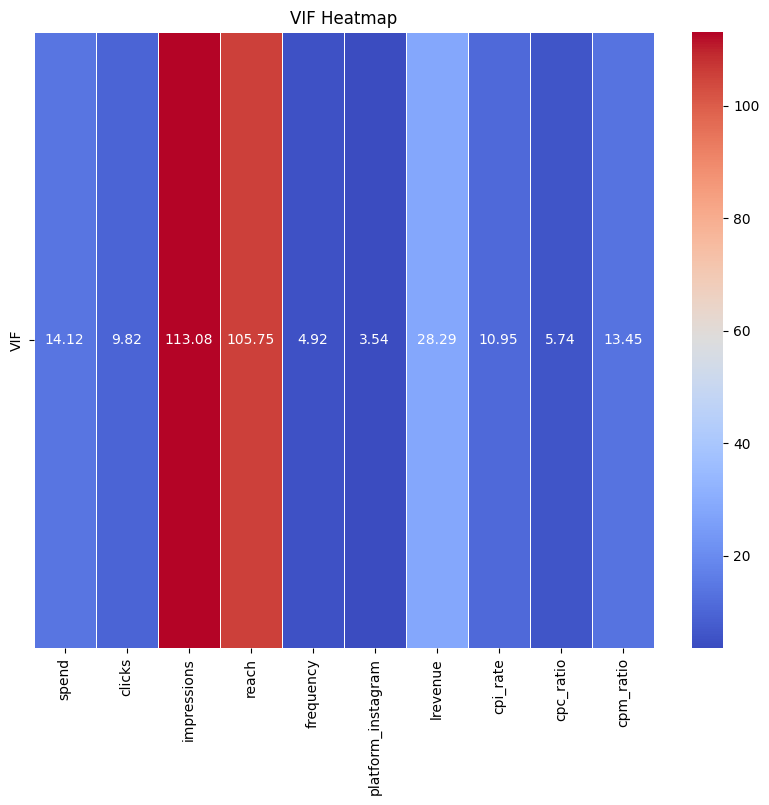

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have your DataFrame 'df' loaded with relevant data

# Calculate VIF for each variable
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Plot heatmap of VIF
def plot_vif_heatmap(vif_data):
    vif_matrix = vif_data.set_index('feature').T.rename_axis(None, axis=1)
    plt.figure(figsize=(10, 8))
    sns.heatmap(vif_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('VIF Heatmap')
    plt.show()

# Assuming X is your independent variable DataFrame
X = df.select_dtypes(include=['float64', 'int64']).drop(columns=['lorders'])

# Calculate VIF
vif_data = calculate_vif(X)

# Plot VIF heatmap
plot_vif_heatmap(vif_data)

In [ ]:
df.describe()

,spend,clicks,impressions,reach,frequency,platform_instagram,lrevenue,lorders,cpi_rate,cpc_ratio,cpm_ratio
count,268.000000,268.000000,2.680000e+02,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,3919.614067,3841.902985,1.656358e+05,138596.455224,19.160821,0.541045,9.767594,4.121787,0.022906,1.552907,24.792535
std,4359.004801,5038.077654,1.929302e+05,164007.450412,18.367696,0.499245,1.753362,1.722203,0.014394,1.095891,10.471558
min,50.370000,14.000000,1.708000e+03,1321.000000,1.040000,0.000000,5.003946,0.000000,0.002596,0.173684,8.602278
25%,643.297500,514.750000,3.252575e+04,25818.750000,5.460000,0.000000,8.641222,2.890372,0.012682,0.735110,17.962168
50%,2283.180000,1861.500000,9.188900e+04,73937.500000,12.210000,1.000000,10.105509,4.465908,0.020201,1.318891,22.582996
75%,5414.972500,5622.000000,2.350805e+05,197215.500000,27.025000,1.000000,11.157641,5.530419,0.030933,1.980854,29.735877
max,20755.200000,37604.000000,1.155331e+06,850158.000000,78.430000,1.000000,12.551742,6.778785,0.095086,6.917893,63.379411


In [ ]:
#drop impressions and reach since they have the highest VIF and clicks as it is included with CPI rate
df.drop(['impressions', 'reach', 'clicks', 'spend', 'frequency'], axis=1, inplace=True)

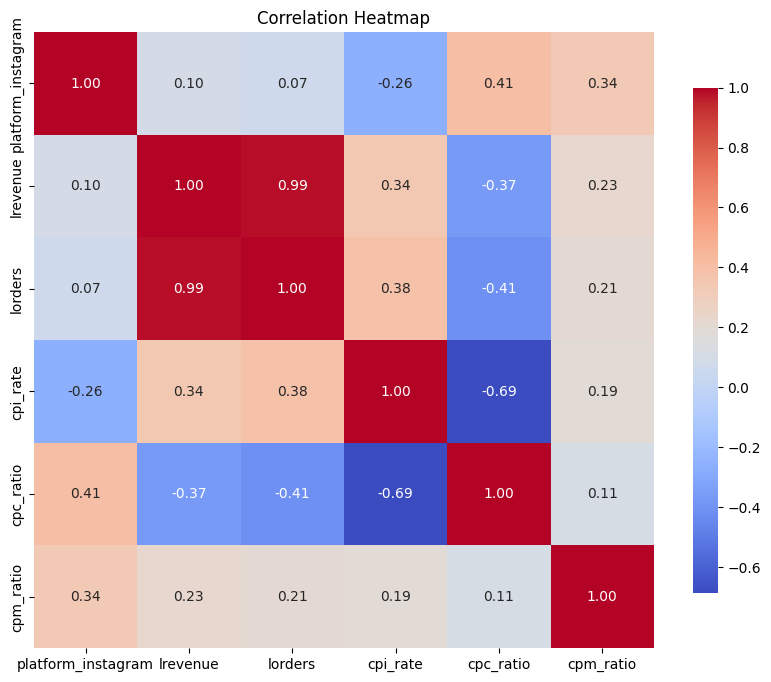

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr.columns, yticklabels=corr.columns,
            cbar_kws={"shrink": .82})

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [ ]:
df = df
df.head(5)

,platform_instagram,lrevenue,lorders,cpi_rate,cpc_ratio,cpm_ratio
0,0,8.497399,2.639057,0.017870,1.710886,30.573689
1,1,12.402088,6.529419,0.016700,2.630889,43.936937
2,0,8.193400,2.639057,0.019582,1.670634,32.715110
4,1,8.204945,2.302585,0.012112,3.850435,46.635071
5,0,9.083529,3.178054,0.019354,1.902818,36.827659


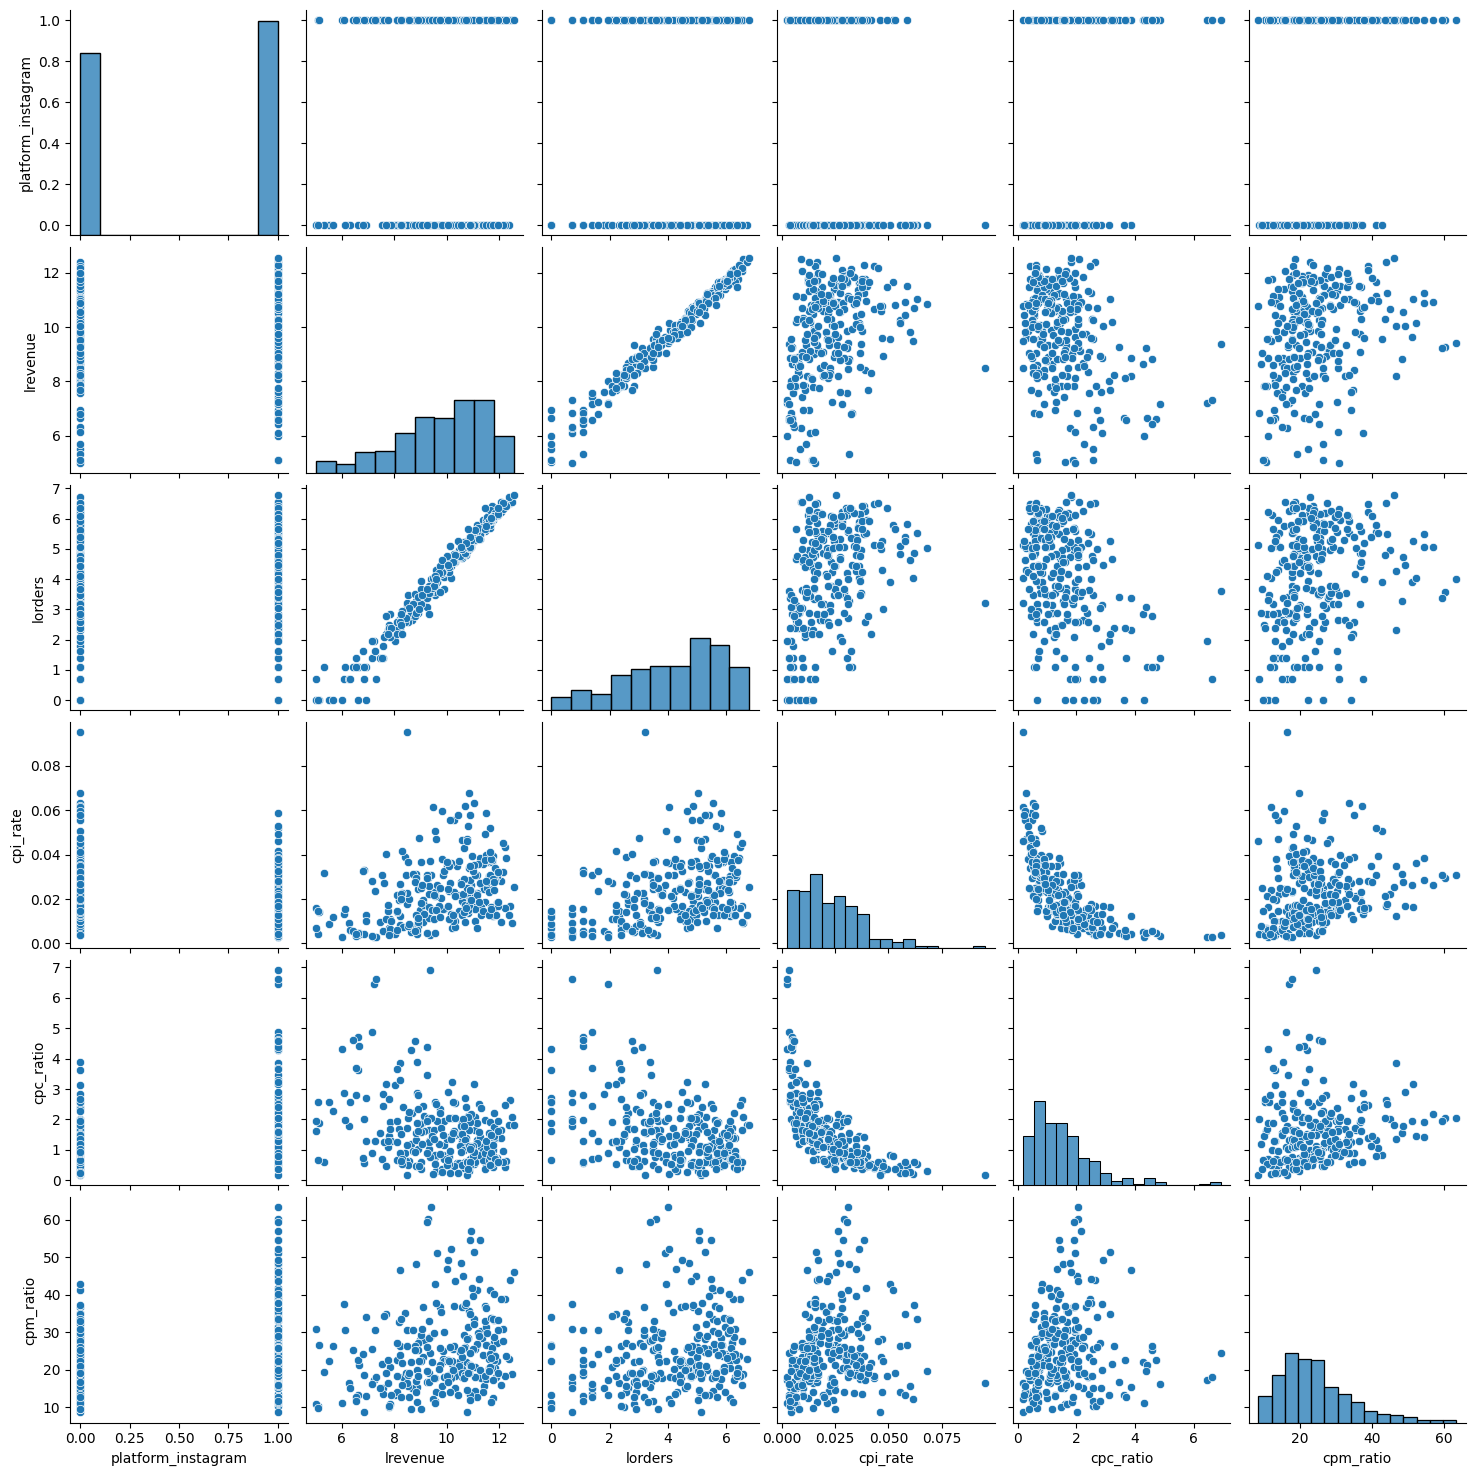

In [ ]:
sns.pairplot(df)

#Model construction

# Linear Model

In [ ]:
from sklearn.model_selection import train_test_split

# Build a model with orders as response variable

# Specify the independent variables (X) and dependent variable (Y)
X = df.drop(['lorders', 'lrevenue'], axis=1)
y =df['lorders']

# Assign a seed value
seed = 0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Add a constant term to the independent variables for the intercept term
X_train = sm.add_constant(X_train)

# MLR model on the training data set
lm_lorders = sm.OLS(y_train, X_train).fit()
print(lm_lorders.summary())

                            OLS Regression Results                            
Dep. Variable:                lorders   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     14.60
Date:                Sat, 13 Apr 2024   Prob (F-statistic):           2.32e-10
Time:                        00:26:18   Log-Likelihood:                -340.60
No. Observations:                 187   AIC:                             691.2
Df Residuals:                     182   BIC:                             707.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1414      0

In [ ]:
# Calculating the MSE of X_train

# Predict the target variable using the fitted model on the training data
y_train_pred = lm_lorders.predict(X_train)

# Use the predicted values of y in our MSE calculation
mse_train = round(((y_train - y_train_pred)**2).mean(),5)

print(f'Training Data MSE: {mse_train}')

Training Data MSE: 2.23655


# Scoring the model on Test set

In [ ]:
# Add a constant term to the independent variables for the intercept term
X_test = sm.add_constant(X_test)

# Predict the target variable using the fitted model on the test data
y_pred = lm_lorders.predict(X_test)

# Use the predicted values of y in our MSE calculation
mse_test = round(((y_test - y_pred)**2).mean(),5)

print(f'Test Data MSE: {mse_test}')


Test Data MSE: 1.90871


In [ ]:
mse_difference = round((mse_train - mse_test),5)
print(f'The MSE changed by {mse_difference} from the training data to test data.')

The MSE changed by 0.32784 from the training data to test data.


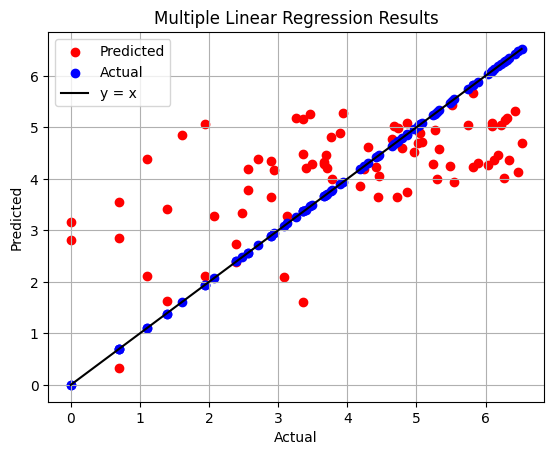

In [ ]:
# Plotting the results
plt.scatter(y_test, y_pred, color='red', label='Predicted')
plt.scatter(y_test, y_test, color='blue', label='Actual')

# Adding the reference line y = x
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', label='y = x')

# Adding title and labels
plt.title('Multiple Linear Regression Results')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Adding legend, grid, and displaying the plot
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#platform_instagram	lrevenue	lorders	cpi_rate	cpc_ratio	cpm_ratio
px.scatter(df,y ='lorders', x =['platform_instagram', 'cpi_rate', 'cpc_rate', 'cpm_ratio'], trendline = 'ols', title = 'Multiple Linear Regression Results')

ValueError: All arguments should have the same length. The length of column argument `df[y]` is 268, whereas the length of  previously-processed arguments ['x'] is 4

In [ ]:
# Assuming df is your DataFrame containing the data

# Check the length of the 'orders' column
orders_length = len(df['lorders'])
print("Length of 'orders' column:", orders_length)

# Check the length of other columns, such as 'platform_instagram', 'cpi_rate', 'cpc_ratio', 'cpm_ratio'
platform_instagram_length = len(df['platform_instagram'])
cpi_rate_length = len(df['cpi_rate'])
cpc_ratio_length = len(df['cpc_ratio'])
cpm_ratio_length = len(df['cpm_ratio'])

print("Length of 'platform_instagram' column:", platform_instagram_length)
print("Length of 'cpi_rate' column:", cpi_rate_length)
print("Length of 'cpc_ratio' column:", cpc_ratio_length)
print("Length of 'cpm_ratio' column:", cpm_ratio_length)

#Ridge Regression

In [ ]:
#load the csv file locally
df = pd.read_csv('campaign_dataset3.csv')

In [ ]:
# Drop the columns from the DataFrame that are not useful
df.drop(['ad_name', 'ad_id'], axis=1, inplace=True)

In [ ]:
## Combining impressions and clicks to create Clicks per Impressions Rate
df['cpi_rate'] = df['clicks'] / df['impressions']
# Cost per click ratio - spend/clicks
df['cpc_ratio'] = df['spend']/df['clicks']
# Cost per impression ratio - spend/impressions*1000
df['cpm_ratio'] = (df['spend']/df['impressions'])*1000

In [ ]:
# Change the platform column to an indicator variable
df = pd.get_dummies(df, drop_first = True, dtype=int)

In [ ]:
#drop impressions and reach since they have the highest VIF and clicks as it is included with CPI rate
df.drop(['impressions', 'reach', 'clicks', 'spend', 'frequency', 'revenue'], axis=1, inplace=True)

In [ ]:
df_ridge = df

In [ ]:
df_ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = df_ridge.drop('orders', axis=1)
y =df_ridge['orders']

seed = 0

#split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Scale features separately for training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression Model
ridgeReg = Ridge(alpha=100, fit_intercept=True)

# Fit the model
ridgeReg.fit(X_train_scaled, y_train)

# Predictions on the test data
y_pred = ridgeReg.predict(X_test_scaled)

# Calculate the test MSE
mse = mean_squared_error(y_test, y_pred)

# Print coefficients and MSE
print("\nCoefficients:\n", pd.Series(ridgeReg.coef_, index=X.columns))
print("\nMSE:", mse)

# Ridge regression train and test scores
train_score_ridge = ridgeReg.score(X_train_scaled, y_train)
test_score_ridge = ridgeReg.score(X_test_scaled, y_test)
print("\nTrain Score for Ridge Model:", train_score_ridge)
print("Test Score for Ridge Model:", test_score_ridge)

# Coefficient of determination of the prediction (R^2)
r_squared = ridgeReg.score(X_test_scaled, y_test)
print("\nR^2:", r_squared)

# Plot Ridge regression line
plt.figure(figsize=(10, 6))

# Plotting the original data
plt.scatter(X_train_scaled[:, 0], y_train, label='Training Data', color='blue')
plt.scatter(X_test_scaled[:, 0], y_test, label='Testing Data', color='red')

# Plotting the regression line
plt.plot(X_test_scaled[:, 0], y_pred, color='black', linewidth=2, label='Ridge Regression')

plt.title('Ridge Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Specify the independent variables (X) and dependent variable (y)
X = df_ridge.drop('orders', axis=1)
y = df_ridge['orders'] + 2  # Add a small constant to avoid zero values
y = np.log(y)  # Apply logarithm transformation

# Assign a seed value
seed = 2

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression Model
ridgeReg = Ridge(alpha=10, fit_intercept=True)
ridgeReg.fit(X_train_scaled, y_train)

# Calculate predictions
y_pred = ridgeReg.predict(X_test_scaled)

# Print coefficients & Calculate the test MSE
print("\nCoefficients:\n")
print(pd.Series(ridgeReg.coef_, index=X.columns))
print("\nMSE:\n")
print(mean_squared_error(y_test, y_pred))

# Train and test score for Ridge regression
train_score_ridge = ridgeReg.score(X_train_scaled, y_train)
test_score_ridge = ridgeReg.score(X_test_scaled, y_test)
print("\nRidge Model:\n")
print("The train score for ridge model is", train_score_ridge)
print("The test score for ridge model is", test_score_ridge)

# Plotting the results
plt.figure(figsize=(10, 6))

# Plotting the original data
plt.scatter(X_train_scaled[:, 0], y_train, label='Training Data', color='blue')
plt.scatter(X_test_scaled[:, 0], y_test, label='Testing Data', color='red')

# Plotting the regression line
plt.plot(X_test_scaled[:, 0], y_pred, color='black', linewidth=2, label='Ridge Regression')

plt.title('Ridge Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_lasso = df

In [ ]:
df_lasso

,orders,cpi_rate,cpc_ratio,cpm_ratio,platform_instagram
0,14,0.017870,1.710886,30.573689,0
1,685,0.016700,2.630889,43.936937,1
2,14,0.019582,1.670634,32.715110,0
3,1370,0.019067,1.597230,30.454497,1
4,10,0.012112,3.850435,46.635071,1
...,...,...,...,...,...
315,87,0.016911,2.913749,49.275636,1
316,3805,0.056344,0.499431,28.139744,0
317,2799,0.049843,0.747828,37.274073,1
318,1095,0.060102,0.317838,19.102655,0


In [ ]:
#Lasso - loss function = OLS loss function + |abs| of each coefficient multiplied by some constant, alpha
## Can be used for feature selection - shrinks the coefficients of less important features to zero
## Features not shrunk to zero are selected by the lasso
from sklearn.linear_model import LassoCV
import operator

X = df_lasso.drop(['orders'],axis=1).values
y = df_lasso['orders'].values

#X = df_lasso.drop(['orders'],axis=1).values
#y = df_lasso['orders'].values

# Assign a seed value
seed = 0

#split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Lasso Cross validation - tests different alphas to find best one
lasso_cv = LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10], random_state=seed).fit(X_train, y_train)

# Print coefficients
print("\nCoefficients:", lasso_cv.coef_)

# Predictions on the test data
y_pred = lasso_cv.predict(X_test)

# Calculate the test MSE
mse = mean_squared_error(y_test, y_pred)
print("\nMSE:", mse)

# Score
print("The train score for lasso model is", lasso_cv.score(X_train, y_train))
print("The test score for lasso model is", lasso_cv.score(X_test, y_test))

# Coefficient of determination of the prediction (R^2)
print("\nR^2:", lasso_cv.score(X_test, y_test))

# Plot Lasso data
plt.figure(figsize=(10, 6))

# Plotting the original data
plt.scatter(X_train[:, 0], y_train, label='Training Data', color='blue')
plt.scatter(X_test[:, 0], y_test, label='Testing Data', color='red')

# Sorting the values for plotting
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test[:, 0], y_pred), key=sort_axis)
X_test_sorted, y_pred_sorted = zip(*sorted_zip)

# Plotting the regression line
plt.plot(X_test_sorted, y_pred_sorted, color='black', linewidth=2, label='Lasso Regression')

plt.title('Lasso CV')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

SyntaxError: incomplete input (<ipython-input-742-b25d1cba1617>, line 58)